In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("titanic-training-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Age.fillna(df.Age.median(), inplace =True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.drop("Cabin", axis = 1, inplace=True)

In [7]:

df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
df = pd.get_dummies(df, columns=["Pclass","Sex","Embarked"],drop_first  = True)

In [10]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1


In [11]:
df.drop(["PassengerId","Name","Ticket","SibSp","Parch"], inplace= True, axis = 1)
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,0,1
1,1,38.0,71.2833,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,1


In [12]:
df.drop("Fare", inplace = True, axis = 1)
df.head()

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,0,1,1,0,1
1,1,38.0,0,0,0,0,0
2,1,26.0,0,1,0,0,1
3,1,35.0,0,0,0,0,1
4,0,35.0,0,1,1,0,1


In [13]:
df.drop("Age", inplace = True, axis = 1)

In [14]:
df.head()

,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,0,1,1,0,1
1,1,0,0,0,0,0
2,1,0,1,0,0,1
3,1,0,0,0,0,1
4,0,0,1,1,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    889 non-null    int64
 1   Pclass_2    889 non-null    uint8
 2   Pclass_3    889 non-null    uint8
 3   Sex_male    889 non-null    uint8
 4   Embarked_Q  889 non-null    uint8
 5   Embarked_S  889 non-null    uint8
dtypes: int64(1), uint8(5)
memory usage: 18.2 KB


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
model = DecisionTreeClassifier(criterion= 'gini',max_depth= 3)

In [18]:
x = df.drop("Survived", axis = 1)
y  = df['Survived']

In [19]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state= 1)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
print(model.score(x_test,y_test))
model.score(x_train,y_train)

0.8352059925093633


0.8006430868167203

In [21]:
from sklearn.ensemble import BaggingClassifier
bgl = BaggingClassifier(n_estimators=50)
bgl.fit(x_train,y_train)

BaggingClassifier(n_estimators=50)

In [22]:
bgl.score(x_test,y_test)

0.8352059925093633

In [23]:
from sklearn.model_selection import cross_val_score
df2  = pd.DataFrame(cross_val_score(DecisionTreeClassifier(),x,y,cv= 50))

In [24]:
df2

,0
0,0.833333
1,0.777778
2,0.888889
3,0.888889
4,0.722222
5,0.777778
6,0.777778
7,0.777778
8,0.722222
9,0.777778


In [25]:
df2.mean(0)

0    0.811111
dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators= 10)


In [30]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [31]:
model.score(x_test,y_test)

0.797752808988764

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_predictions= model.predict(x_test)

In [34]:
cm  = confusion_matrix(y_test,y_predictions)
cm

array([[170,   8],
       [ 46,  43]], dtype=int64)

Text(0.5, 15.0, 'predicted value')

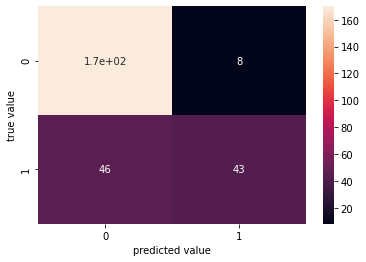

In [35]:
sns.heatmap(cm,annot = True)
plt.ylabel("true value")
plt.xlabel("predicted value")

In [36]:
len(y_test)

267

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abcl= AdaBoostClassifier(n_estimators= 8)
abcl.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=8)

In [38]:
abcl.score(x_test,y_test)

0.8127340823970037

In [39]:
abcl.score(x_train,y_train)

0.7620578778135049

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=39)

In [41]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.8167202572347267

In [42]:
rf.score(x_test,y_test)

0.797752808988764

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 12)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [44]:
gb.score(x_test,y_test)

0.797752808988764

In [45]:
gb.score(x_train,y_train)

0.8167202572347267

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nai = GaussianNB()
nai = model.fit(x_train,y_train)

In [50]:
predict = nai.predict(x_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, predict))
predict  = nai.predict(x_test)
accuracy_score(predict,y_test)

0.8167202572347267


0.797752808988764

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [53]:
xscaled =  x.apply(zscore)
xscaled.describecribe()

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,6.993531e-18,3.157080e-16,-3.601668e-16,-7.193346e-17,1.064016e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-5.108746e-01,-1.110706e+00,-1.359911e+00,-3.079409e-01,-1.621287e+00
25%,-5.108746e-01,-1.110706e+00,-1.359911e+00,-3.079409e-01,-1.621287e+00
50%,-5.108746e-01,9.003281e-01,7.353420e-01,-3.079409e-01,6.167940e-01
75%,-5.108746e-01,9.003281e-01,7.353420e-01,-3.079409e-01,6.167940e-01
max,1.957427e+00,9.003281e-01,7.353420e-01,3.247377e+00,6.167940e-01


In [54]:
x_train,x_test,y_train,y_test = train_test_split(xscaled,y,test_size  = 0.3, random_state=1)

In [65]:
knn = KNeighborsClassifier(n_neighbors=23, metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [66]:
predict = knn.predict(x_test)
knn.score(x_test,y_test)

0.8352059925093633

In [67]:
knn.score(x_train,y_train)

0.8006430868167203

In [68]:
from sklearn.svm import SVC
x= df.drop('Survived', axis = 1)
y = df['Survived']

In [69]:
xscaled = x.apply(zscore)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(xscaled,y,test_size  = 0.3, random_state=1)

In [77]:
svm = SVC(C = 3, gamma=1)

In [78]:
svm.fit(x_train,y_train)

SVC(C=3, gamma=1)

In [79]:
svm.score(x_train,y_train)

0.8006430868167203

In [80]:
svm.score(x_test,y_test)

0.8314606741573034